<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#単回帰分析" data-toc-modified-id="単回帰分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>単回帰分析</a></span><ul class="toc-item"><li><span><a href="#最小二乗法" data-toc-modified-id="最小二乗法-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>最小二乗法</a></span><ul class="toc-item"><li><span><a href="#手動ver" data-toc-modified-id="手動ver-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>手動ver</a></span></li><li><span><a href="#パッケージver" data-toc-modified-id="パッケージver-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>パッケージver</a></span></li></ul></li><li><span><a href="#最尤法" data-toc-modified-id="最尤法-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>最尤法</a></span></li></ul></li><li><span><a href="#多変数間の関係を捉える" data-toc-modified-id="多変数間の関係を捉える-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>多変数間の関係を捉える</a></span></li></ul></div>

In [1]:
import pandas as pd
data = pd.DataFrame({
        "weight" : [i for i in range(5,55,5)],
        "length" : [5.4, 5.7, 6.9, 6.4, 8.2, 7.7, 8.4, 10.1, 9.9, 10.5]
    })
data

,length,weight
0,5.4,5
1,5.7,10
2,6.9,15
3,6.4,20
4,8.2,25
5,7.7,30
6,8.4,35
7,10.1,40
8,9.9,45
9,10.5,50


# 単回帰分析

## 最小二乗法

In [2]:
from sympy import *
#数式操作が可能になるライブラリ

#sympyを用いて数式出力方法
init_printing()

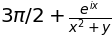

In [3]:
#例
x = Symbol('x')
y = Symbol('y')
Rational(3 ,2)*pi + exp(I*x) / (x**2 + y)

In [4]:
#なぜか使えないので
init_session()

MultipleInstanceError: Multiple incompatible subclass instances of TerminalInteractiveShell are being created.

In [5]:
#自分で定義
from __future__ import division

x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

init_printing()

### 手動ver

In [6]:
b0, b1 = symbols("b0 b1")

j = (y - (b1 * x + b0)) ** 2

In [7]:
#diff : 差分を取る
j_b0 = diff(j, b0)

In [8]:
j_b1 = diff(j, b1)

In [9]:
#

#subs : 関数（j_b1）のxに値（point[1]["weight"]）を代入、yにも値を代入
sum_b0 = sum([j_b0.subs([(x, point[1]["weight"]), (y, point[1]["length"])]) for point in data.iterrows()]) / 2.
sum_b1 = sum([j_b1.subs([(x, point[1]["weight"]), (y, point[1]["length"])]) for point in data.iterrows()]) / 2.

<img src = "http://cdn-ak.f.st-hatena.com/images/fotolife/s/sinhrks/20150618/20150618222231.png">

In [10]:
#solve : 微分
b = solve([sum_b0, sum_b1], [b0, b1])
b

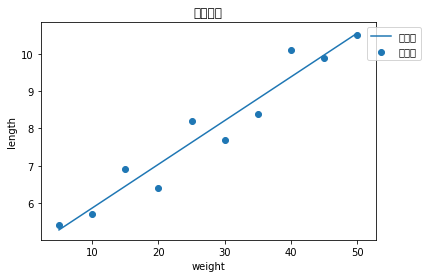

In [11]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data["weight"], [b[b0] + b[b1]*expected for expected in list(data["weight"])], label='予測値')
plt.scatter(data["weight"], data["length"], label='測定値')
plt.title('線形回帰')
plt.xlabel('weight')
plt.ylabel('length')
plt.legend(bbox_to_anchor=(1.15, 1.0))
plt.show()

### パッケージver

In [10]:
from sklearn import linear_model

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
#as_matrix()・・・dataframeからarrayに変換
regr.fit(data["weight"].as_matrix()[:,None], data["length"].as_matrix()[:,None])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.11733333]]


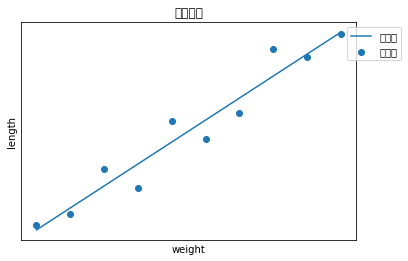

In [15]:
# Plot outputs
plt.scatter(data["weight"], data["length"], label='測定値')
plt.plot(data["weight"], regr.predict(data["weight"].as_matrix()[:,None]), label='予測値')

plt.xticks(())
plt.yticks(())

plt.title('線形回帰')
plt.xlabel('weight')
plt.ylabel('length')
plt.legend(bbox_to_anchor=(1.15, 1.0))

plt.show()

## 最尤法 

各実験点で観測されるデータはある確率分布に従って得られるものであるという過程の基に観測されたデータが得られる確率を最大化するような回帰係数を推定する方法

# 多変数間の関係を捉える 

In [3]:
import numpy as np
import scipy as sp
import pandas as pd

In [4]:
temp = [(34.1 + (52.6 - 34.1)/85*i) for i in range(1000)]
press = [(2.3 + (4.8 - 2.3)/85*i) for i in range(1000)]
catal = [(0.1 + (1.1 - 0.1)/85*i) for i in range(1000)]
ph = [(6.4 + (7.8 - 6.4)/85*i) for i in range(1000)]
y = []
for i in range(1000):
    y.append(0.5*temp[i]+2*press[i]+6.5*catal[i]+1*ph[i])
    
y = pd.DataFrame({      
        "物質の量" : y
})
y.head(5)

,物質の量
0,28.700000
1,28.960588
2,29.221176
3,29.481765
4,29.742353


In [19]:
def set_X_with_noise_pH(level):
    np.random.seed(0)
    X = pd.DataFrame({      
            "温度" : [d + np.random.normal(0,0.01) for d in temp],
            "圧力" : [d + np.random.normal(0,0.01) for d in press],
            "触媒量" : [d + np.random.normal(0,0.01) for d in catal],
            "pH" : [d + np.random.normal(0,level) for d in ph]
    })
    X_without_pH = X.drop('pH', axis = 1)
    return X, X_without_pH

X, X_without_pH = set_X_with_noise_pH(1)

In [20]:
X.head(5)

,pH,圧力,温度,触媒量
0,7.993274,2.305560,34.117641,0.084671
1,6.985193,2.338337,34.321649,0.094645
2,6.318454,2.354600,34.545081,0.123991
3,6.701042,2.389282,34.775350,0.125710
4,5.255027,2.419928,34.989264,0.146251


In [21]:
X_without_pH.head(5)

,圧力,温度,触媒量
0,2.305560,34.117641,0.084671
1,2.338337,34.321649,0.094645
2,2.354600,34.545081,0.123991
3,2.389282,34.775350,0.125710
4,2.419928,34.989264,0.146251


In [8]:
#テストデータと訓練データの準備
X_train = X.as_matrix()[:-100]
X_test = X.as_matrix()[-100:]
X_without_pH_train = X_without_pH.as_matrix()[:-100]
X_without_pH_test = X_without_pH.as_matrix()[-100:]
y_train = y.as_matrix()[:-100]
y_test = y.as_matrix()[-100:]
print(X_train.shape)
print(X_test.shape)
print(X_without_pH_train.shape)
print(X_without_pH_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 4)
(100, 4)
(900, 3)
(100, 3)
(900, 1)
(100, 1)


説明変数からpHを入れた訓練データによる線形回帰モデルとpHを省いた訓練データによる線形回帰モデルのAICをそれぞれ計算

In [11]:
from math import log, pi
def get_AIC_and_model(X,y,n,p):
    if n != y.shape[0] or p != X.shape[1]:
        raise ValueError('Check shape')
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    y_hat = regr.predict(X)
    sigma2 = 0
    for i in range(n):
        sigma2 += (y[i] - y_hat[i])*(y[i] - y_hat[i])
    sigma2 /= n
    aic = n * log(2*pi*sigma2) + n + 2*(p+2)
    return aic, regr
    
aic, model = get_AIC_and_model(X_train, y_train, 900, 4)
print("pHを入れた訓練データによる線形回帰モデルのAIC : ",aic)
aic_without_pH, model_without_pH = get_AIC_and_model(X_without_pH_train, y_train, 900, 3)
print("pHを省いた訓練データによる線形回帰モデルのAIC : ",aic_without_pH)

pHを入れた訓練データによる線形回帰モデルのAIC :  -5455.266316204605
pHを省いた訓練データによる線形回帰モデルのAIC :  -5457.015806555966


２つのモデルを用いて100個のテストデータに対して予測を行い、誤差大きさの平均を比較

In [12]:
def check_loss(model, X_test, y_test, n):
    y_predict = model.predict(X_test)
    loss = 0
    for i in range(n):
        loss += (y_test[i] - y_predict[i])*(y_test[i] - y_predict[i])
    loss /= n
    return loss

loss = check_loss(model, X_test, y_test, 100)[0]
print("pHを入れた訓練データによる線形回帰モデルによる予測のloss : ",loss)
loss_without_pH = check_loss(model_without_pH, X_without_pH_test, y_test, 100)[0]
print("pHを省いた訓練データによる線形回帰モデルによる予測のloss : ",loss_without_pH)


pHを入れた訓練データによる線形回帰モデルによる予測のloss :  0.00013922675707546287
pHを省いた訓練データによる線形回帰モデルによる予測のloss :  0.00013897910666387948


pHをモデルに入れた方が良さそうな場合を最後に確認してみよう。
pHのデータに割と小さいノイズを入れて見る。

In [13]:
X, X_without_pH = set_X_with_noise_pH(0.0001)
X_train = X.as_matrix()[:-100]
X_test = X.as_matrix()[-100:]
X_without_pH_train = X_without_pH.as_matrix()[:-100]
X_without_pH_test = X_without_pH.as_matrix()[-100:]
aic, model = get_AIC_and_model(X_train, y_train, 900, 4)
print("pHを入れた訓練データによる線形回帰モデルのAIC : ",aic)
aic_without_pH, model_without_pH = get_AIC_and_model(X_without_pH_train, y_train, 900, 3)
print("pHを省いた訓練データによる線形回帰モデルのAIC : ",aic_without_pH)
loss = check_loss(model, X_test, y_test, 100)[0]
print("pHを入れた訓練データによる線形回帰モデルによる予測のloss : ",loss)
loss_without_pH = check_loss(model_without_pH, X_without_pH_test, y_test, 100)[0]
print("pHを省いた訓練データによる線形回帰モデルによる予測のloss : ",loss_without_pH)

pHを入れた訓練データによる線形回帰モデルのAIC :  -9016.423223568825
pHを省いた訓練データによる線形回帰モデルのAIC :  -5457.015806555966
pHを入れた訓練データによる線形回帰モデルによる予測のloss :  2.228996078296541e-06
pHを省いた訓練データによる線形回帰モデルによる予測のloss :  0.00013897910666387948
